In [ ]:
!pip install opendatasets pandas numpy scikit-learn matplotlib plotly seaborn --quiet

In [ ]:
import opendatasets as od
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

%matplotlib inline
pd.set_option('display.max_columns',None)             #some initial settings for better visualization of graphs and whatnot...
pd.set_option('display.max_rows',150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [ ]:
od.download('https://www.kaggle.com/jsphyg/weather-dataset-rattle-package')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: glennmathews
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package


100%|██████████| 3.83M/3.83M [00:00<00:00, 165MB/s]

In [ ]:
os.listdir('weather-dataset-rattle-package')
raw_df=pd.read_csv('weather-dataset-rattle-package/weatherAUS.csv')
raw_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
raw_df.dropna(subset=['RainTomorrow'],inplace=True)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null   fl

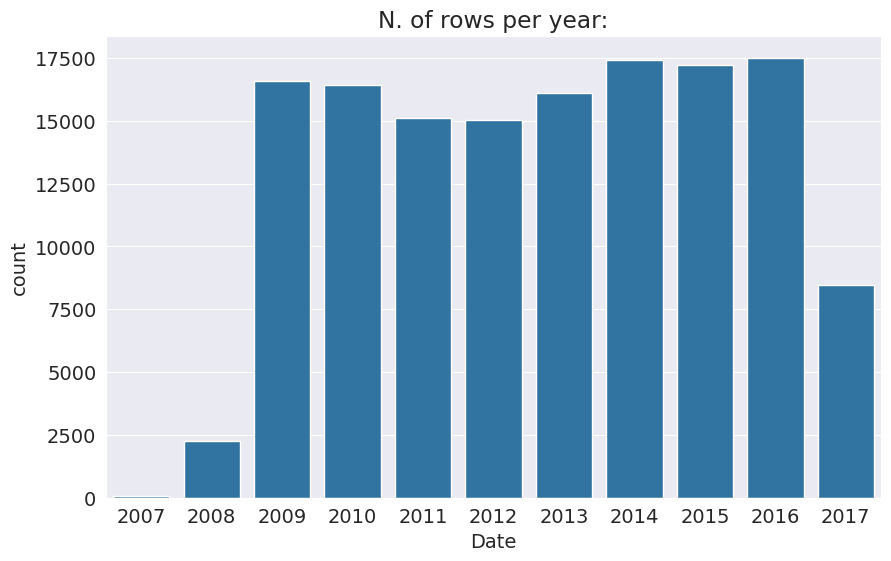

In [ ]:
plt.title('N. of rows per year:')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [ ]:
year=pd.to_datetime(raw_df.Date).dt.year
train_df=raw_df[year<2015]                    #we are doing this here instead of train_test_split
val_df=raw_df[year==2015]
test_df=raw_df[year>2015]
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(98988, 23)
(17231, 23)
(25974, 23)


In [ ]:
input_cols=list(train_df.columns)[1:-1]
target_col='RainTomorrow'
train_inputs=train_df[input_cols].copy()             #creating the train, test and validation sets
train_target=train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()
numerical_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_inputs.select_dtypes('object').columns.tolist()
print(numerical_cols)
print(categorical_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [ ]:
from sklearn.impute import SimpleImputer                                       #imputation
imputer=SimpleImputer(strategy='mean').fit(raw_df[numerical_cols])
train_inputs[numerical_cols]=imputer.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols]=imputer.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols]=imputer.transform(test_inputs[numerical_cols])
test_inputs[numerical_cols].isna().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler                                    #scaling the values of numerical columns
scaler=MinMaxScaler().fit(raw_df[numerical_cols])
train_inputs[numerical_cols]=scaler.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols]=scaler.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols]=scaler.transform(test_inputs[numerical_cols])
train_inputs[numerical_cols].describe().loc[['min','max']]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
min,0.0,0.013233,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0304,0.0,0.0,0.027426,0.005758
max,1.0,1.000000,1.0,0.568276,0.986207,1.0,0.669231,1.0,1.0,1.0,1.0,1.0000,1.0,1.0,1.000000,0.988484


In [ ]:
from sklearn.preprocessing import OneHotEncoder                            #categorizing with one hot encoding
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore').fit(raw_df[categorical_cols])
train_df[categorical_cols].fillna('Unknown')
val_df[categorical_cols].fillna('Unknown')
test_df[categorical_cols].fillna('Unknown')
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))
train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols]=encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
<ipython-input-95-96f8995fdfe5>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])
<ipython-input-95-96f8995fdfe5>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols

In [ ]:
x_train=train_inputs[numerical_cols+encoded_cols]
x_val=val_inputs[numerical_cols+encoded_cols]
x_test=test_inputs[numerical_cols+encoded_cols]
x_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
0,0.516509,0.523629,0.001617,0.037723,0.525852,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.500352,0.508439,0.522073,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.375000,0.565217,0.000000,0.037723,0.525852,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.493021,0.500352,0.514768,0.570058,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.504717,0.576560,0.000000,0.037723,0.525852,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.493021,0.222222,0.594937,0.548944,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.417453,0.620038,0.000000,0.037723,0.525852,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.493021,0.500352,0.533755,0.612284,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.

In [ ]:
from sklearn.tree import DecisionTreeClassifier                       #Classfication using decision trees...
model=DecisionTreeClassifier(random_state=7).fit(x_train,train_target)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
train_preds=model.predict(x_train)
print(train_preds)
pd.value_counts(train_preds)

['No' 'No' 'No' ... 'No' 'No' 'No']


<ipython-input-98-4f767a865b8b>:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_preds)


,count
No,76707
Yes,22281


In [ ]:
print(accuracy_score(train_target,train_preds))            #here the accuracy is high due to overfitting as in the val and test sets it is seen that the model is only marginally better than always predicting no!
print(model.score(x_val,val_targets))
print(model.score(x_test,test_targets))

0.9999797955307714
0.7923509952991701
0.7731962731962732


48


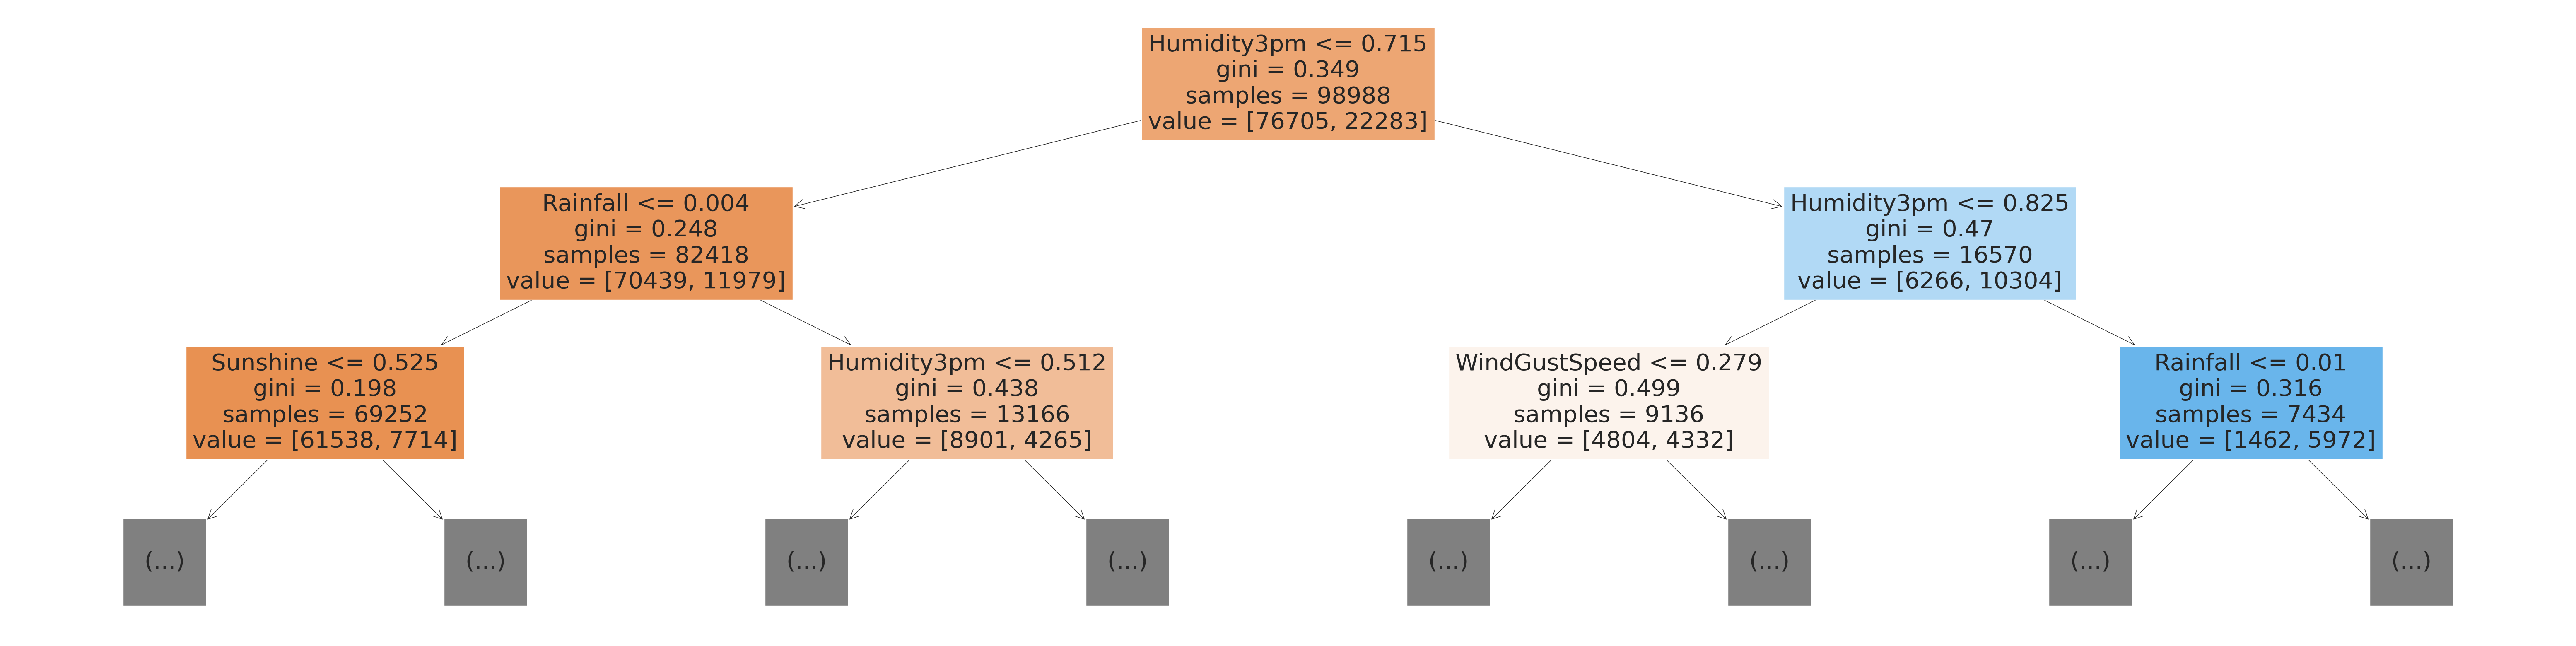

In [ ]:
from sklearn.tree import plot_tree,export_text
print(model.tree_.max_depth)
plt.figure(figsize=(80,20))
plot_tree(model,feature_names=x_train.columns,max_depth=2,filled=True);

In [ ]:
tree_text=export_text(model,max_depth=10,feature_names=x_train.columns)
print(tree_text[:4800])                #displaying the tree as text as well

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

In [ ]:
#model.feature_importances_    #displaying the importance assigned to each feature in the dataset
pd.DataFrame({"Features":x_train.columns,"Importances":model.feature_importances_}).sort_values('Importances',ascending=False).head(10)

,Features,Importances
9,Humidity3pm,0.260732
11,Pressure3pm,0.061514
2,Rainfall,0.059820
5,WindGustSpeed,0.055405
4,Sunshine,0.050296
8,Humidity9am,0.040211
0,MinTemp,0.036432
10,Pressure9am,0.034455
14,Temp9am,0.032656
1,MaxTemp,0.031679


In [ ]:
def depth_error(md):
  model=DecisionTreeClassifier(max_depth=md,random_state=7)         #determining the best hyperparameter values - here, for max_depth
  model.fit(x_train,train_target)
  train_acc=1-model.score(x_train,train_target)
  val_acc=1-model.score(x_val,val_targets)
  return {"Max_depth":md,'Training error':train_acc,'Validation error':val_acc}
error_df=pd.DataFrame([depth_error(md) for md in range(1,21)])
error_df

,Max_depth,Training error,Validation error
0,1,0.184315,0.177935
1,2,0.179547,0.172712
2,3,0.170869,0.166560
3,4,0.165707,0.164355
4,5,0.160676,0.159074
5,6,0.156271,0.157275
6,7,0.153312,0.154605
7,8,0.147806,0.157971
8,9,0.140906,0.156462
9,10,0.133026,0.157855


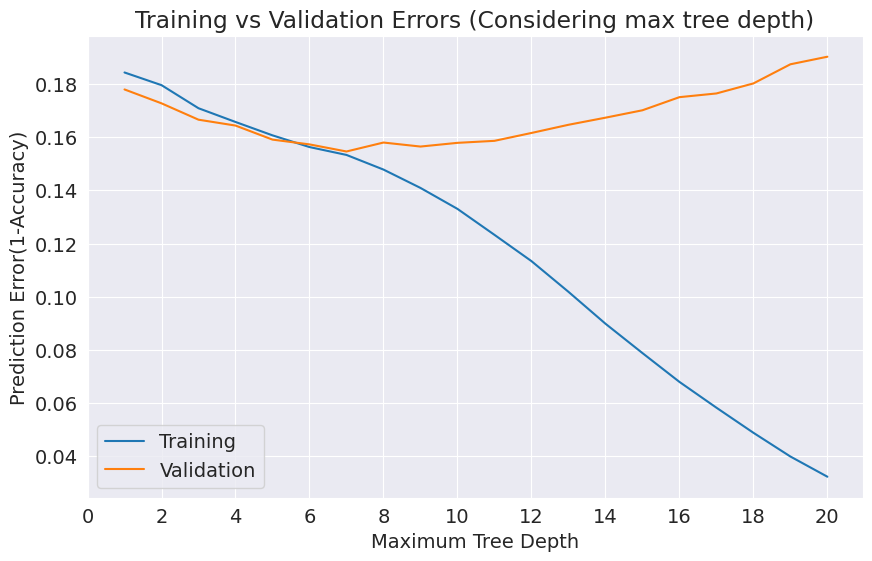

In [ ]:
plt.figure()
plt.plot(error_df['Max_depth'],error_df['Training error'])
plt.plot(error_df['Max_depth'],error_df['Validation error'])
plt.title('Training vs Validation Errors (Considering max tree depth)')
plt.xticks(range(0,21,2))
plt.xlabel("Maximum Tree Depth")
plt.ylabel("Prediction Error(1-Accuracy)")
plt.legend(['Training','Validation'])

In [ ]:
model=DecisionTreeClassifier(max_depth=7,random_state=7).fit(x_train,train_target)
print(model.score(x_train,train_target))
print(model.score(x_val,val_targets))           #best accuracy at depth 7 (see graph)

0.8466884874934335
0.8453949277465034


In [ ]:
#let us also consider max_leaf_nodes
def leaf_error(ed):
  model=DecisionTreeClassifier(max_leaf_nodes=ed,random_state=7)         #determining the best hyperparameter values - here, for max_depth
  model.fit(x_train,train_target)
  train_acc=1-model.score(x_train,train_target)
  val_acc=1-model.score(x_val,val_targets)
  return {"Max_leaf_nodes":ed,'Training error':train_acc,'Validation error':val_acc}
errorleaf_df=pd.DataFrame([leaf_error(ed) for ed in range(10,200,10)])
errorleaf_df

,Max_leaf_nodes,Training error,Validation error
0,10,0.167061,0.164761
1,20,0.162757,0.162382
2,30,0.159373,0.159480
3,40,0.158777,0.159190
4,50,0.156847,0.157043
5,60,0.156080,0.156868
6,70,0.155989,0.156752
7,80,0.155413,0.157159
8,90,0.154362,0.155708
9,100,0.153998,0.155708


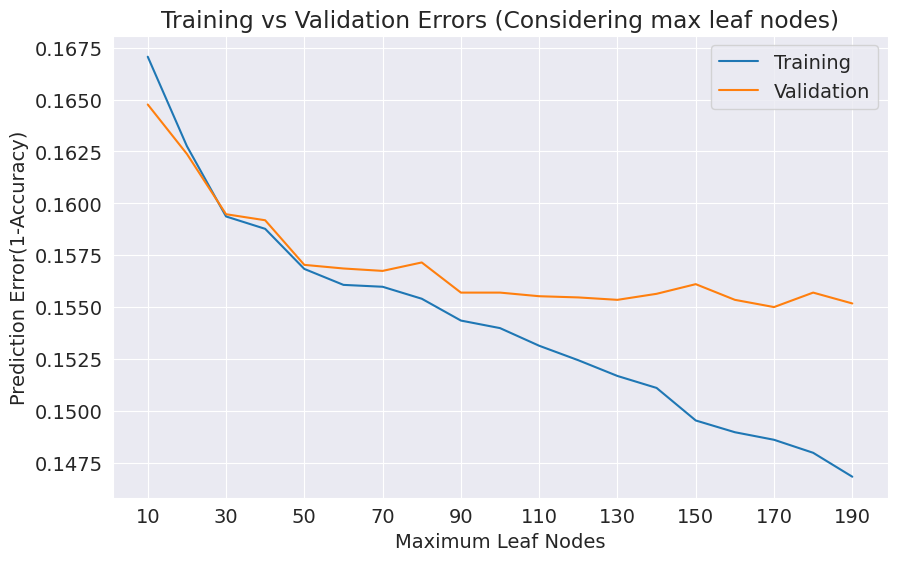

In [ ]:
plt.figure()
plt.plot(errorleaf_df['Max_leaf_nodes'],errorleaf_df['Training error'])
plt.plot(errorleaf_df['Max_leaf_nodes'],errorleaf_df['Validation error'])
plt.title('Training vs Validation Errors (Considering max leaf nodes)')
plt.xticks(range(10,200,20))
plt.xlabel("Maximum Leaf Nodes")
plt.ylabel("Prediction Error(1-Accuracy)")
plt.legend(['Training','Validation'])

In [ ]:
# so a good amount of leaf nodes for this model is about 45
model=DecisionTreeClassifier(max_leaf_nodes=128,random_state=7).fit(x_train,train_target)
print(model.score(x_train,train_target))
print(model.score(x_val,val_targets))
model.tree_.max_depth

0.8480421869317493
0.8442342290058615


12

Towards RANDOM FORESTS :


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_jobs=-1,random_state=7)   #n_jobs for allowing multiple parallel workers, parallelly building each decision tree
model.fit(x_train,train_target)

RandomForestClassifier(n_jobs=-1, random_state=7)

In [ ]:
print(model.score(x_train,train_target))
print(model.score(x_val,val_targets))

0.9999393865923142
0.8560733561604086


In [ ]:
model.predict_proba(x_train)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [0.99, 0.01],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.97, 0.03]])

In [ ]:
print(len(model.estimators_))       #the number of decision trees in the forest
model.estimators_[0]

100


DecisionTreeClassifier(max_features='sqrt', random_state=327741615)

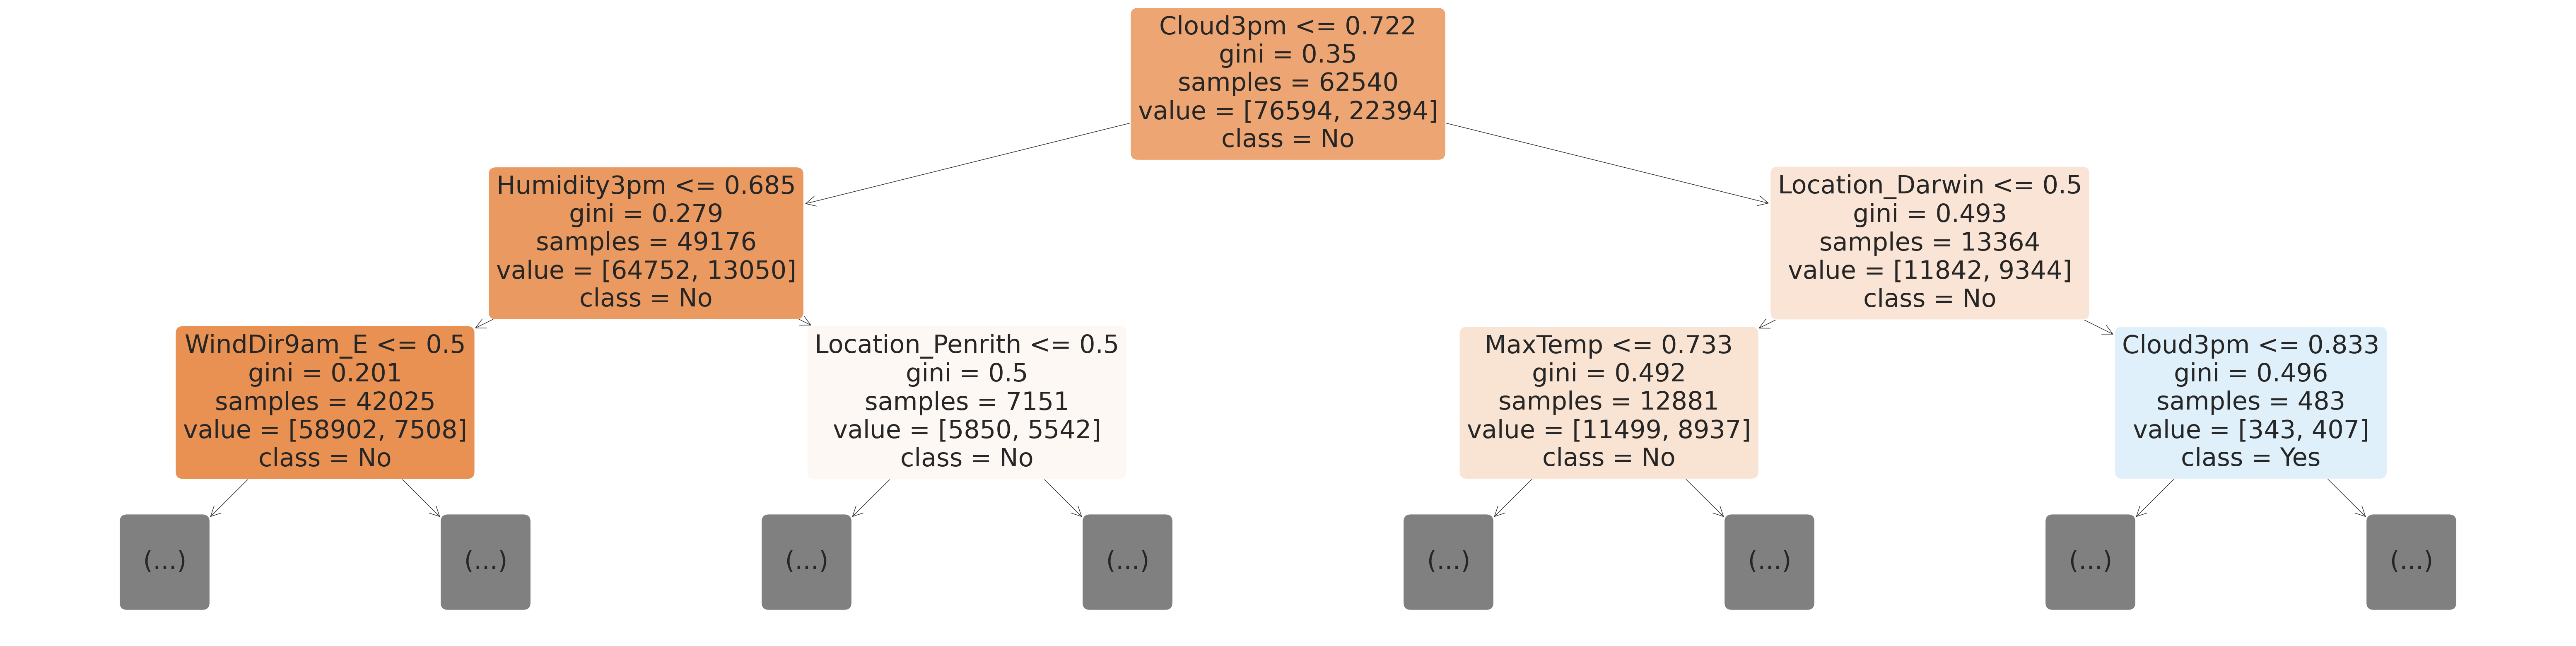

In [ ]:
plt.figure(figsize=(80,20))
plot_tree(model.estimators_[10],max_depth=2,feature_names=x_train.columns,filled=True,rounded=True,class_names=model.classes_);

In [ ]:
pd.DataFrame({'feature':x_train.columns,'importances':model.feature_importances_}).sort_values('importances',ascending=False).head(10)

,feature,importances
9,Humidity3pm,0.133203
4,Sunshine,0.054623
11,Pressure3pm,0.053553
8,Humidity9am,0.049953
10,Pressure9am,0.048317
5,WindGustSpeed,0.047843
15,Temp3pm,0.045821
2,Rainfall,0.042487
0,MinTemp,0.041903
1,MaxTemp,0.041592


In [ ]:
base_model=RandomForestClassifier(random_state=7,n_jobs=-1).fit(x_train,train_target)
base_train_acc=model.score(x_train,train_target)
base_val_acc=model.score(x_val,val_targets)
base_acc=base_train_acc,base_val_acc
base_acc                 #just as a base benchmark for further tuning

(0.9999393865923142, 0.8560733561604086)

In [ ]:
#we can change the number of estimators(Decision tress) in the randomforest model, but here lets tune for max_depth and max_leaf_nodes
def test_params(**params):
  model=RandomForestClassifier(random_state=7,n_jobs=-1,**params).fit(x_train,train_target)
  return model.score(x_train,train_target) , model.score(x_val,val_targets)
print(base_acc)
print(test_params(max_depth=25))
print(test_params(max_leaf_nodes=2**20))

(0.9999393865923142, 0.8560733561604086)
(0.9773608922293612, 0.855086762230863)
(0.9999494888269285, 0.8575242295862109)


In [ ]:
test_params(max_depth=5,max_leaf_nodes=1024,n_estimators=105)

(0.8230088495575221, 0.8276362370146828)

In [ ]:
print(test_params(max_features=6))
print(test_params(max_features='log2'))         #taking only a fraction of dataset features for training each decision tree in the forest.
print(base_acc)

(0.9999494888269285, 0.8563054959085369)
(0.9999494888269285, 0.8563054959085369)
(0.9999393865923142, 0.8560733561604086)


In [ ]:
print(test_params(min_samples_split=5,min_samples_leaf=2))
print(test_params(min_impurity_decrease=1e-7))   #nodes are split only when the gini value of the child is favourably lower than the gini value of the node before split.
print(base_acc)

(0.9570048894815533, 0.8555510417271197)
(0.9995656039115852, 0.8558992513493123)
(0.9999393865923142, 0.8560733561604086)


In [ ]:
print(test_params(bootstrap=False))      #bootstrapping means for each decision tree in the forest - rows from the dataset are picked randomly for training
base_acc                                 #here we try disabling bootstrapping for our model

(0.9999797955307714, 0.8577563693343393)


(0.9999393865923142, 0.8560733561604086)

In [ ]:
print(test_params(max_samples=0.9))         #when bootstrapping is enabled - we can specify the size of each bootstrap for each tree
base_acc

(0.9997676486038711, 0.8566537055307295)


(0.9999393865923142, 0.8560733561604086)

In [ ]:
print(train_target.value_counts())
print(test_params(class_weight='balanced'))            #giving equal weightage for each label - as the count of 'no' in the dataset is much higher than the 'yes's
print(test_params(class_weight={'No':1,'Yes':2}))          #manually assigning weight for each class/label
base_acc

RainTomorrow
No     76705
Yes    22283
Name: count, dtype: int64
(0.9999393865923142, 0.855086762230863)
(0.9999393865923142, 0.8552608670419592)


(0.9999393865923142, 0.8560733561604086)

In [ ]:
#now building the final model, encorporating all the customized/tuned parameters
model=RandomForestClassifier(n_jobs=-1,n_estimators=500,max_features=7,max_depth=30,class_weight={'No':1,'Yes':1.5},bootstrap=False,random_state=7).fit(x_train,train_target)
print(model.score(x_train,train_target), model.score(x_val,val_targets))
base_acc

0.998504869277084 0.8589751030120132


(0.9999393865923142, 0.8560733561604086)

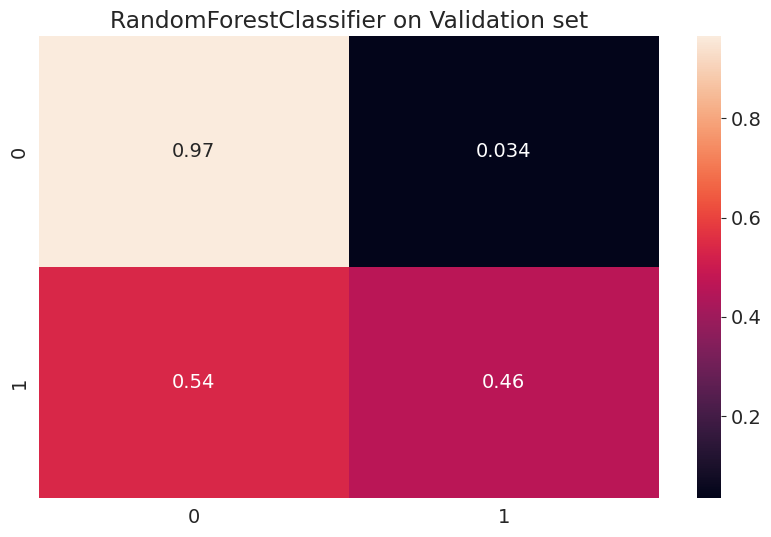

In [ ]:
pred=model.predict(x_val)
plt.title('RandomForestClassifier on Validation set')
sns.heatmap(confusion_matrix(val_targets,pred,normalize='true'),annot=True);

In [ ]:
model.score(x_test,test_targets)

0.8473473473473474

In [ ]:
#predicting for single inputs
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numerical_cols] = imputer.transform(input_df[numerical_cols])
    input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input=input_df[numerical_cols + encoded_cols]
    pred=model.predict(X_input)[0]
    prob=model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

'''example input:

new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}
'''
